In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
info_df = pd.read_csv('snopes_ground_truth.csv')
info_df.head()

,snopes_page,topic,claim,claim_label,date_published,date_updated,page_url,page_is_example,page_is_image_credit,page_is_archived,page_is_first_citation,tags
0,http://www.snopes.com/rowan-atkinson-death-hoax/,fake news,"British actor Rowan Atkinson, best known as 'M...",False,"Jul 15th, 2016","Mar 18th, 2017",https://www.shutterstock.com/image-photo/mosco...,False,True,False,False,NaN
1,http://www.snopes.com/european-parental-leave-...,politics,"Canada, Norway, and Germany each offer federal...",True,"Mar 16th, 2017",NaN,https://www.facebook.com/senatorsanders/photos...,False,False,False,True,"canada,sen-kirsten-gillibrand,sen-bernie-sande..."
2,http://www.snopes.com/are-blue-balls-a-real-th...,love,Prolonged sexual arousal in men without an eja...,True,"Mar 15th, 2017",NaN,http://pediatrics.aappublications.org/content/...,False,False,False,True,NaN
3,http://www.snopes.com/politics/soapbox/knox.asp,political news,The president of Knox Machinery wrote a letter...,True,"Dec 16th, 2008","Mar 14th, 2017",http://knoxmachinery.com,False,False,False,True,NaN
4,http://www.snopes.com/photographs-of-eiffel-to...,NaN,It is illegal to take photographs of the Eiffe...,True,"Mar 13th, 2017",NaN,http://www.toureiffel.paris/,False,False,False,True,"paris,photography,eiffel-tower,copyright"


In [3]:
topic_fake_count = info_df.groupby(['topic', 'claim_label'])['claim_label'].count()
topic_fake_count

topic                claim_label
astronomy news       True            1
business             False           5
                     True           10
cokelore             True            1
college              False           1
                     True            1
computers            False           2
                     True            1
crime                False           4
                     True            8
critter country      False           2
                     True            9
disney               False           2
                     True            1
entertainment        False           7
                     True            7
fake news            False          81
                     True            1
fauxtography         False          51
                     True           44
food                 False           2
                     True            4
glurge gallery       True            3
history              False           4
                     True      

In [4]:
vectorizer = TfidfVectorizer(input='filename',max_df=0.7, max_features=100,
                                 min_df=2, stop_words='english',encoding='utf-8',decode_error ='ignore',
                                 use_idf=True)

count_vectorizer = CountVectorizer(input='filename',max_df=0.7, max_features=20,
                                 min_df=2, stop_words='english',encoding='utf-8',decode_error ='ignore')

In [5]:
import os
a = os.listdir('sentences_tokenized/')
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

a = sorted_aphanumeric(a)
b =[]
for i in a:
    i = 'sentences_tokenized/'+i
    b.append(str(i)) 
vect_matrix = vectorizer.fit_transform(b)

In [6]:
vect_matrix.shape

(562, 100)

In [7]:
train_features, test_features = vect_matrix[:400,],vect_matrix[401:563,]
train_labels, test_labels = info_df['claim_label'][:400] , info_df['claim_label'][401:563]

In [8]:
logistic = linear_model.LogisticRegression()

logr= logistic.fit(train_features,train_labels)

In [9]:
logr.score(test_features,test_labels)

0.6956521739130435

[[53 35]
 [14 59]]


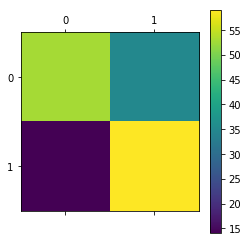

In [10]:
pred = logr.predict(test_features)
labels = ['x', 'y']
cm = confusion_matrix(test_labels, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.show()

In [11]:
print(classification_report(test_labels, pred))

             precision    recall  f1-score   support

      False       0.79      0.60      0.68        88
       True       0.63      0.81      0.71        73

avg / total       0.72      0.70      0.69       161



In [12]:
mnb = MultinomialNB()
mnb.fit(train_features,train_labels)
mnb.score(test_features,test_labels)

0.7142857142857143

[[53 35]
 [11 62]]


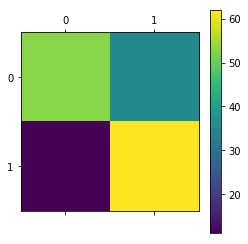

In [13]:
pred = mnb.predict(test_features)
labels = ['x', 'y']
cm = confusion_matrix(test_labels, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.show()

In [14]:
print(classification_report(test_labels, pred))

             precision    recall  f1-score   support

      False       0.83      0.60      0.70        88
       True       0.64      0.85      0.73        73

avg / total       0.74      0.71      0.71       161



In [15]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)

0.6583850931677019

[[45 43]
 [12 61]]


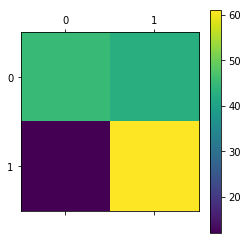

In [16]:
pred = clf.predict(test_features)
labels = ['x', 'y']
cm = confusion_matrix(test_labels, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.show()

In [17]:
print(classification_report(test_labels, pred))

             precision    recall  f1-score   support

      False       0.79      0.51      0.62        88
       True       0.59      0.84      0.69        73

avg / total       0.70      0.66      0.65       161



In [18]:
model = XGBClassifier()
model.fit(train_features, train_labels)
y_pred = model.predict(test_features)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.87%


C:\Users\hnpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[52 36]
 [27 46]]


C:\Users\hnpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


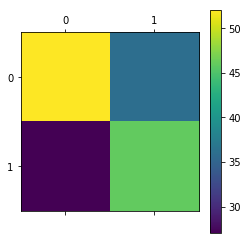

In [19]:
pred = model.predict(test_features)
labels = ['x', 'y']
cm = confusion_matrix(test_labels, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.show()

In [20]:
print(classification_report(test_labels, pred))

             precision    recall  f1-score   support

      False       0.66      0.59      0.62        88
       True       0.56      0.63      0.59        73

avg / total       0.61      0.61      0.61       161



In [21]:
c_vect = count_vectorizer.fit_transform(b)
feature_names_c =  count_vectorizer.get_feature_names()
feature_names = vectorizer.get_feature_names()


In [22]:
nmf = NMF(n_components=len(feature_names), init='nndsvd', random_state=0, alpha=0.1).fit(vect_matrix)
lda = LatentDirichletAllocation(n_topics=len(feature_names_c), max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(c_vect)

C:\Users\hnpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [23]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, feature_names, no_top_words)
display_topics(lda, feature_names_c, no_top_words)

Topic 0:
trump donald people said news president new like social media
Topic 1:
article clinton united trump president obama web people new said
Topic 2:
news web published article trump said donald people president social
Topic 3:
obama president new article trump news web united facebook like
Topic 4:
president obama new said united news published states people time
Topic 5:
people new time states united said like media article social
Topic 6:
clinton hillary time new news said like people social web
Topic 7:
social time trump article like donald new published web media
Topic 8:
media social news said people published web new time like
Topic 9:
social obama people said hillary clinton donald facebook web new
Topic 10:
new news time like facebook president published said social web
Topic 11:
united states trump new president donald article published said news
Topic 12:
article published media news clinton time trump new like facebook
Topic 13:
facebook social people web media like tim

In [24]:
feature_names_c

['article',
 'clinton',
 'donald',
 'facebook',
 'hillary',
 'like',
 'media',
 'new',
 'news',
 'obama',
 'people',
 'president',
 'published',
 'said',
 'social',
 'states',
 'time',
 'trump',
 'united',
 'web']

In [25]:
fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus

# for t in range(20):
#     plt.subplot(1, 20, t + 1)  # plot numbering starts with 1
#     plt.ylim(0, 10 + 0.5)  # stretch the y-axis to accommodate the words
#     plt.xticks([])  # remove x-axis markings ('ticks')
#     plt.yticks([]) # remove y-axis markings ('ticks')
#     plt.title('Topic #{}'.format(t))
#     for topic_idx, topic in enumerate(model.components_):
#         plt.text(0.3, 10-i-0.5, feature_names_c[i], fontsize=fontsize_base*share)
#         print("Topic %d:" % (topic_idx))
#         print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
        
#     top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
#     top_words_idx = top_words_idx[:num_top_words]
#     top_words = mallet_vocab[top_words_idx]
#     top_words_shares = word_topic[top_words_idx, t]
#     for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
#         plt.text(0.3, 10-i-0.5, word, fontsize=fontsize_base*share)

NameError: name 'word_topic' is not defined